# In this notebook:

1. **Visualising a network of entities**
2. Extra other visualisations

# 1. Visualising a network of entities

In [1]:
import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import nltk
# nltk.download('averaged_perceptron_tagger')
# from nltk.tag import pos_tag
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [3]:
# and some more:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

You can use network visualisations to show how things are connected in data.  
Networks are often used for showing networks of people in social media.  
Today we'll use a network visualisation to display how all 

**US presidents are connected in terms of the people they mention in their speeches.**

To do that you'll first learn how to save data to a file. The content of file serves as the input to the network.  
Let's first create the content (```file_content```) which we will write to a file.  
We'll be creating a tsv (tab-separated file), 
meaning that each line contains different fields separated by a tab.  
The first line is the header which lists the names for each column.  
The first column are the names of presidents and the second column the people mentioned in their speeches.  
**e.g) president name | Who mentioned name**

The president/person pairs are created by looping through each speech, extracting the name of each president from the filename of the speech, NER-tagging and extracting people names for each speech.  
For all people extracted from each speech, we then concatenate the ```file_content``` variable with the president's name (```president```) and each person name (```person```) mentioned in his speech followed by a newline character ("\n") so that each pair is on one line. The final ```file_content``` contains the header and 102 lines listing all the president/person pairs in this data set.

The following code was adapted from Jonathan Soma's tutorial on [NetworkX Graphs](http://jonathansoma.com/lede/algorithms-2017/classes/networks/networkx-graphs-from-source-target-dataframe/). __Note: this first bit of code takes some time to run because each speech has to be tagged individually.__

In [5]:
header="president\tperson\n"
file_content=header
for fileid in inaugural.fileids():
    president=fileid[5:-4]
    #nertagged_words = st.tag(inaugural.words(fileid))
    doc = nlp(inaugural.raw(fileid))
    named_entities = [(ent.text, ent.label_) 
                      for ent in doc.ents] 
    #named_entities=get_entities(nertagged_words)
    people = [string 
              for (string, tag) in named_entities 
              if (tag == 'PERSON') and (not string.startswith('\n'))]
    if len(people) > 0:
        for person in people:
            file_content=file_content + president + "\t" + person + "\n"

To write to a file you need to use the ```open()``` method and specify the file's name and mode (in this case "w" for write to file).  You can then use the ```write()``` method and specify the content of the file in brackets.  Don't forget to close the file using ```close()``` once you're done.

In [6]:
f = open("presidents.tsv", "w")
f.write(file_content)
f.close()

You can check that file was created by looking at the Jupyter Notebook homepage in the browser.  The file should now be listed in the same directory as you notebook.

We need to import two further packages to visualise a network.  ```pandas``` is used to represent data frames. and ```networkx``` is needed to create a network.

In [7]:
import pandas as pd
import networkx as nx

__Data frame:__ A data frame is a 2-dimensional labeled data structure with columns of potentially different types.

First we create a data frame by reading in the csv file which we just created.  The top of the data frame can be displayed by calling the ```head()``` method.

In [8]:
df = pd.read_csv("presidents.tsv", sep='\t')
df.head()

,president,person
0,Jefferson,Creator
1,VanBuren,Providence
2,VanBuren,Divine
3,Harrison,Roman
4,Harrison,Creator


The first column in the data frame will serve as the source and the second column as the target in the network.  We can create a simple network specifying source and target using the headers of the columns in the data frame.

__Node:__ A network node is a connection point.

__Edge:__ A network edge is a connection between two nodes. 

This initial network isn't very informative yet as you can't see who each node (blue circles) refers to.  So next we need to make it more pretty.

C:\Users\Steve\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


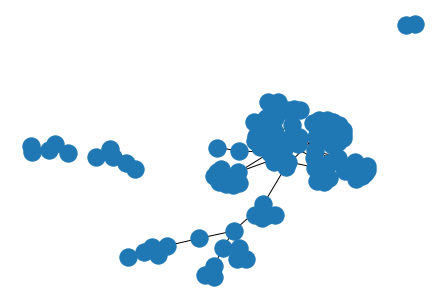

In [9]:
g = nx.from_pandas_edgelist(df, source='president', target='person') 
nx.draw(g)

First we need to create a list of all presidents by extracting their names from the data frame and removing repetitions. Note, these are only presidents whose speeches contain person names tagged by the NER tagger.

In [10]:
presidents = list(df.president.unique())
presidents

['Jefferson',
 'VanBuren',
 'Harrison',
 'Polk',
 'Taylor',
 'Pierce',
 'Buchanan',
 'Grant',
 'Hayes',
 'Cleveland',
 'McKinley',
 'Roosevelt',
 'Taft',
 'Harding',
 'Hoover',
 'Truman',
 'Eisenhower',
 'Kennedy',
 'Nixon',
 'Carter',
 'Reagan',
 'Bush',
 'Clinton',
 'Obama',
 'Trump']

We'll do the same for the names of people recognised in the speeches.

In [11]:
people = list(df.person.unique())
people

['Creator',
 'Providence',
 'Divine',
 'Roman',
 'Jefferson',
 'Madison',
 'Caesar',
 'Octavius',
 'Anthony',
 'Gaul',
 'Ruler',
 'Melancholy',
 'Divine Providence',
 'Whilst',
 'kindred',
 'Santo Domingo',
 'Fort Sumter',
 'Grant',
 'Fellow-Citizens',
 'Yorktown',
 'Webster',
 'kindred evils',
 'Abraham Lincoln',
 'arid lands',
 'Monroe',
 'Root',
 'Gatun',
 'Governments',
 'Calvin Coolidge',
 'Convention',
 'Comfort',
 'Tarry',
 'Peabody',
 'Vice',
 'Chief Justice',
 'Thou',
 'Iwo Jima',
 'a Divine Providence',
 'Speaker',
 'Johnson',
 'Eisenhower',
 'Nixon',
 'Truman',
 'Dirksen',
 'Humphrey',
 'Franklin Delano Roosevelt',
 'Archibald MacLeish',
 'Cook',
 'Julia Coleman',
 'Bible',
 'Ours',
 'Hatfield',
 'President',
 'Bush',
 'Mondale',
 'Baker',
 "O'Neill",
 'Moomaw',
 'Winston Churchill',
 'Joseph Warren',
 'George Washington',
 'Thomas Jefferson',
 'Belleau Wood',
 'Martin Treptow',
 'Mathias',
 'Justice Burger',
 'Dole',
 'Clergy',
 'John Stennis',
 'Gillis Long',
 'Moon',
 'Ad

The degree of a node in a network is the number of connections it has to other nodes.  For example, the degree for "Reagan" can be calculated using the ```degree()``` method on initial network.  We will use degree as a way of varying the node size of person nodes, people with a larger degree will be displayed bigger in the network.

In [12]:
g.degree("Reagan")

26

The following bit of code draws the network. The first two lines set the size of the graph and the layout of the network.  

After that the different nodes are drawn using differnt parameters for node_color and node_size.  Then the edges and node labels are drawn and the title of the network is specified.

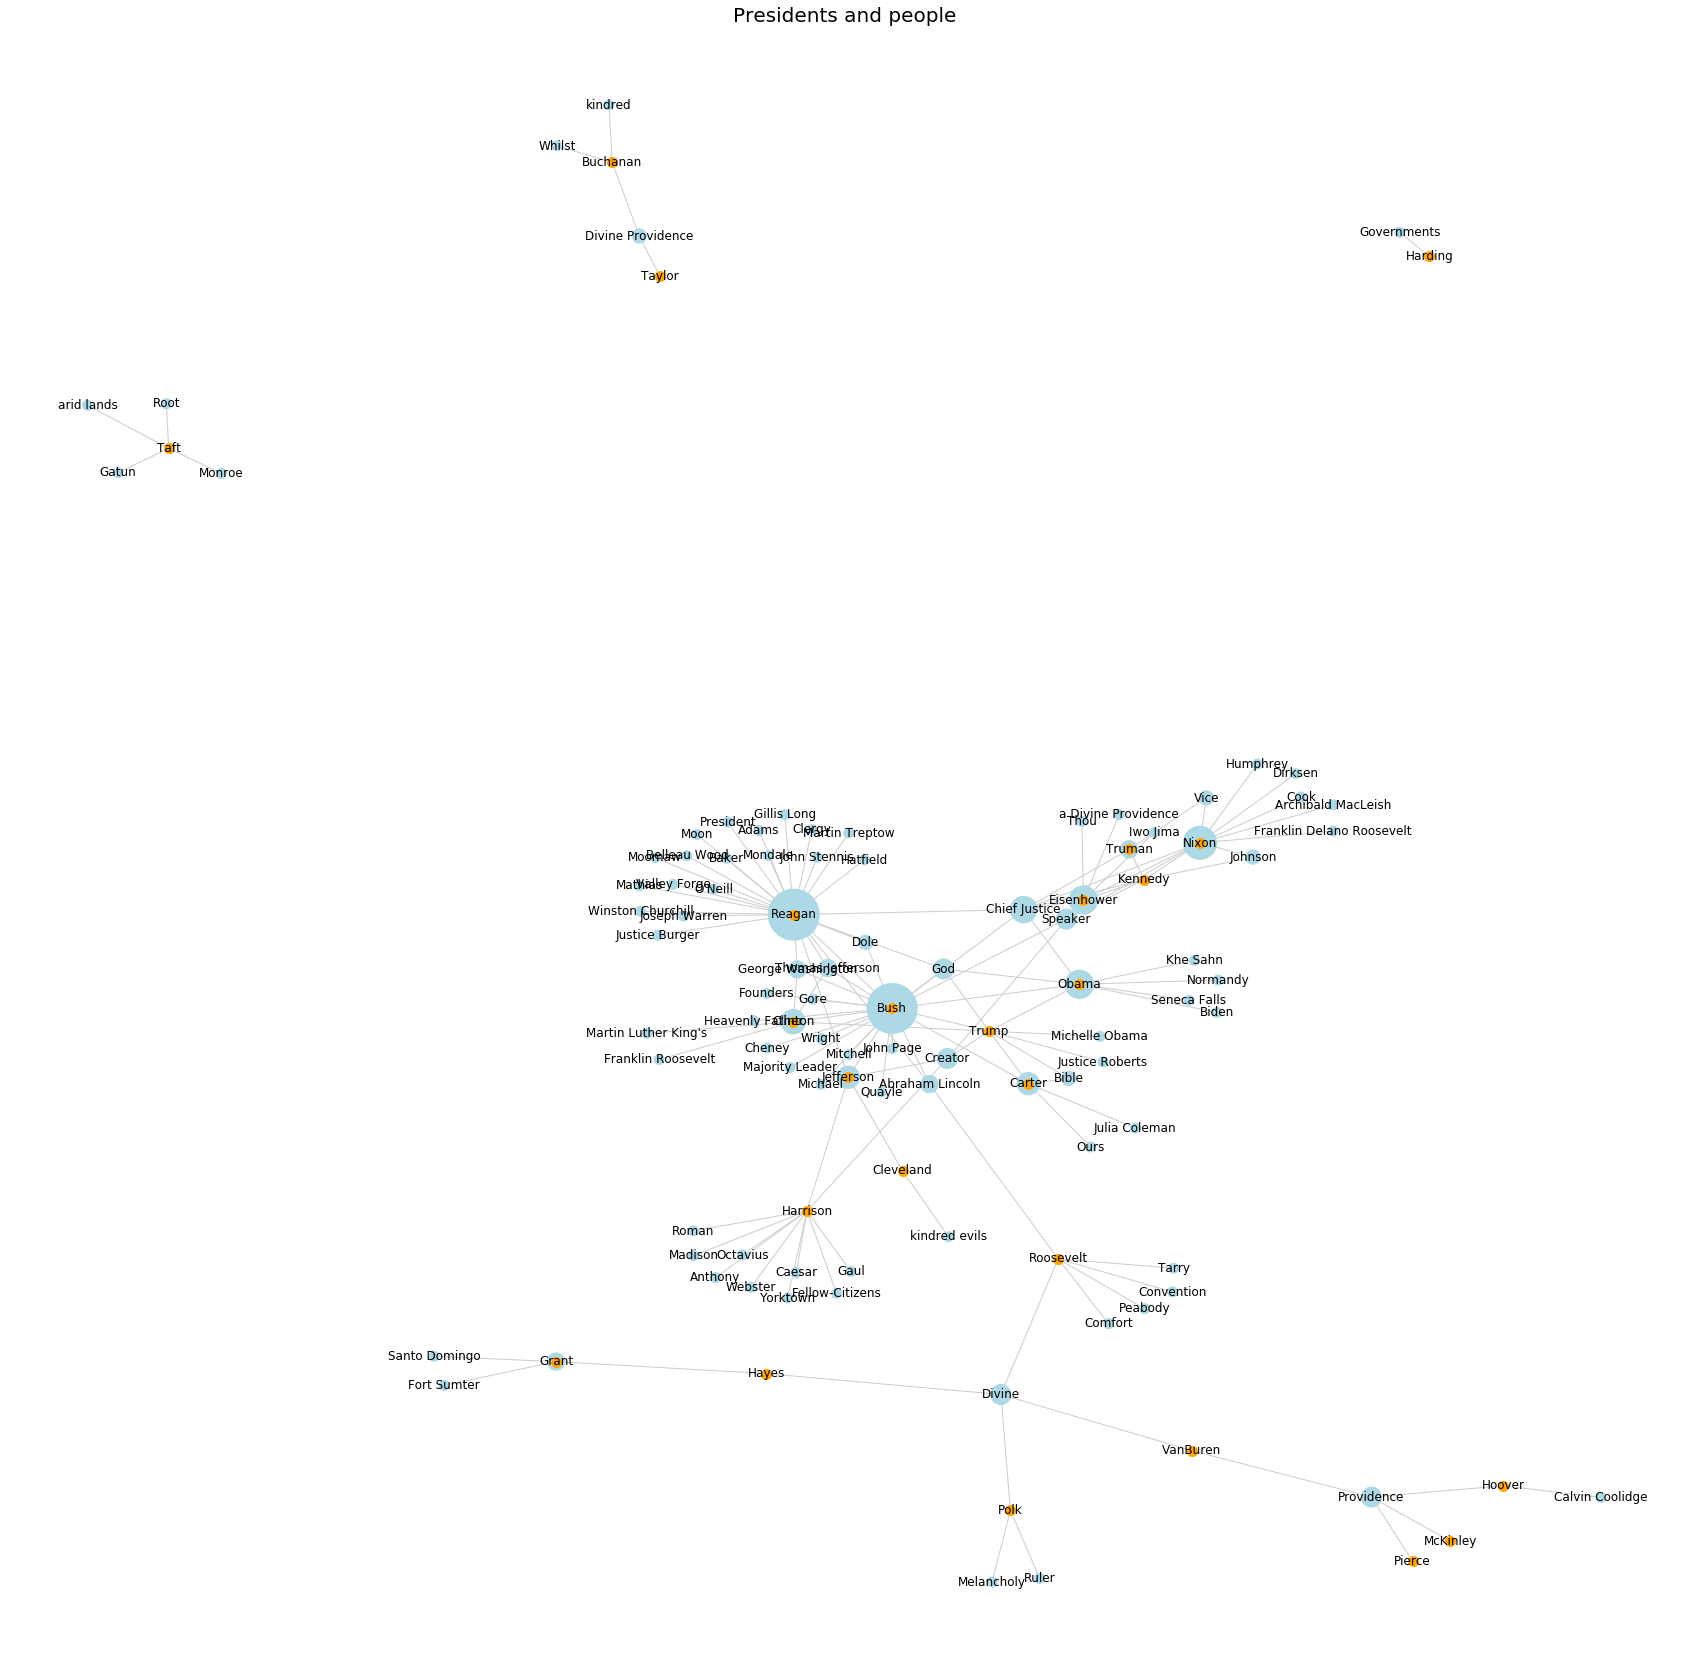

In [13]:
# setting the size of the network
plt.figure(figsize=(30, 30))

# you can choose different ways of laying out the network
layout = nx.spring_layout(g)

# go through every person name, ask the graph how many
# connections it has. Multiply that by 100 to get the circle size
person_size = [g.degree(person) * 100 
               for person in people]

# draw the people nodes
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=people, 
                       node_color='lightblue',
                       node_size=person_size # a list of sizes, based on g.degree
                       )

# draw president nodes 
nx.draw_networkx_nodes(g, layout, nodelist=presidents, node_color='wheat', node_size=100) 

# popular presidents are ones which had more than one presidency

popular_president = [president 
                     for president in presidents 
                     if g.degree(president) > 0 ]

# draw popular president nodes
nx.draw_networkx_nodes(g, layout, nodelist=popular_president, node_color='orange', node_size=100)

# draw network edges
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

# draw node labels
nx.draw_networkx_labels(g, layout, font_size=12)

plt.axis('off')
plt.title("Presidents and people", fontsize=20)
plt.show()

### 🐛Minitask: 

copy-paste the code of above visualisation into below cell and try to customise it with your buddy:

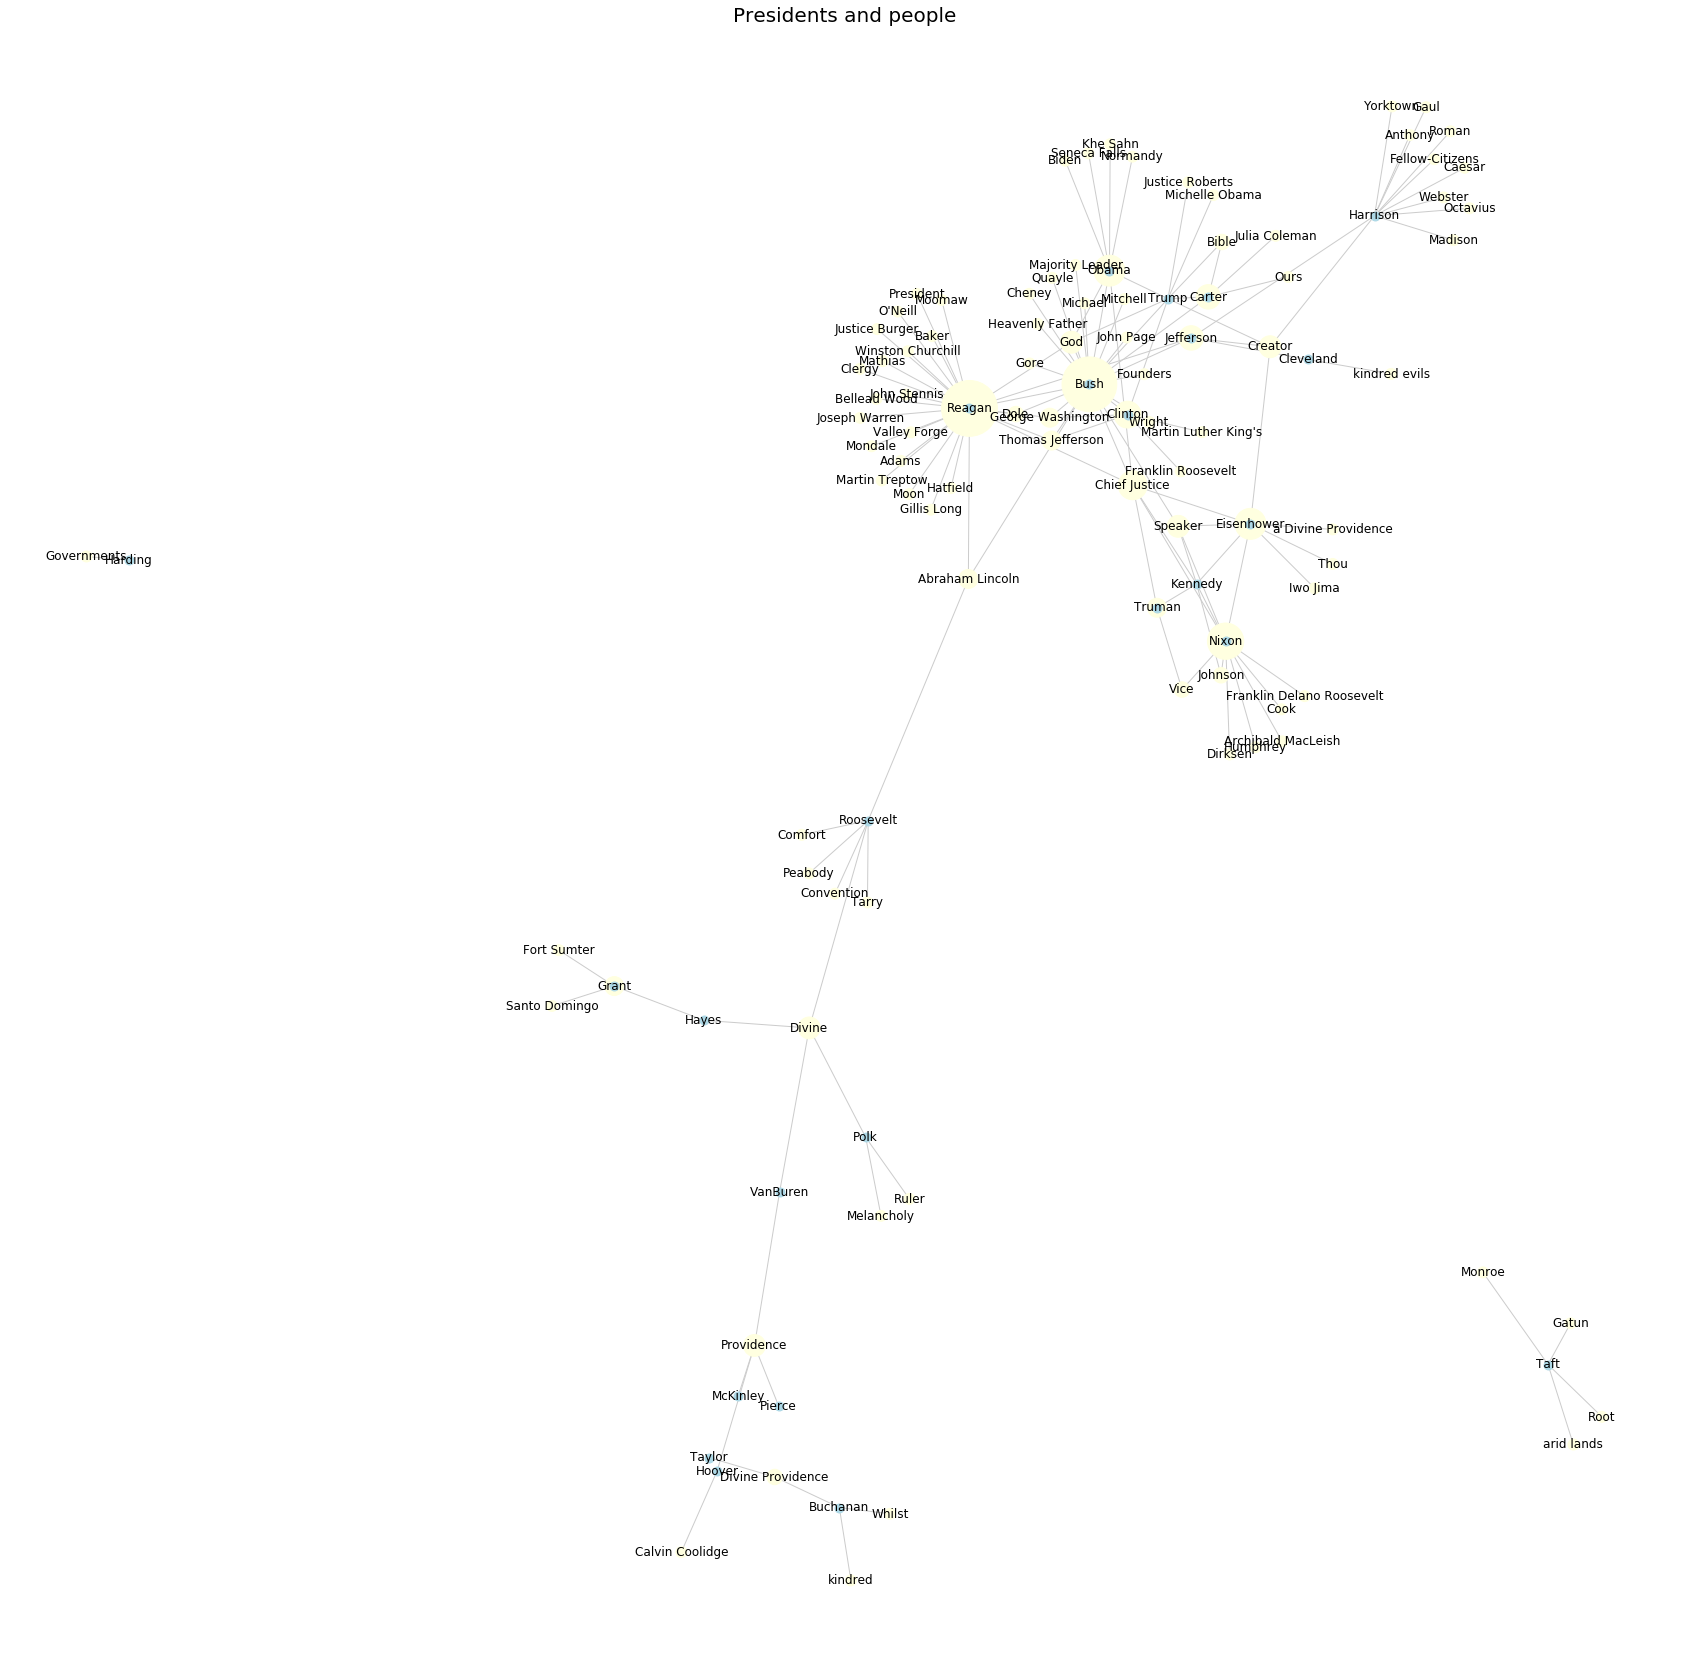

In [29]:
# you can code here:


# Different data type --> complicated. 

# setting the size of the network
plt.figure(figsize=(30, 30))

# you can choose different ways of laying out the network
layout = nx.spring_layout(g)

# go through every person name, ask the graph how many
# connections it has. Multiply that by 100 to get the circle size
person_size = [g.degree(person) * 120 
               for person in people]

# draw the people nodes
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=people,
                       node_color='lightyellow',
                       node_size= person_size # a list of sizes, based on g.degree
                       )

# draw president nodes
nx.draw_networkx_nodes(g, layout, nodelist=presidents, node_color='lightblue', node_size=80)

# popular presidents are ones which had more than one presidency
popular_president = [president
                     for president in presidents
                     if g.degree(president) > 30 ]  # degree ---> Reagen was 26 30?>?

# draw popular president nodes
nx.draw_networkx_nodes(g, layout, nodelist=popular_president, node_color='blue', node_size=100)

# draw network edges
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

# draw node labels
nx.draw_networkx_labels(g, layout, font_size=12)

plt.axis('off')
plt.title("Presidents and people", fontsize=20)
plt.show()

# Another interesting visualisation:

Let's look at entities analysis and highlighting.

`displacy.render(doc, style="ent",jupyter=True)`  would visualise the text with the entities highlighted.

and 

`displacy.render(doc, style="dep",jupyter=True)`  would visualise the text with dependencies of words, but as a method of visualisation it works best for short sentences:

In [14]:
import spacy
from spacy import displacy

nlp = en_core_web_sm.load()

text = "When Sebastian Thrun started working on self-driving cars at Google in 2007, "
text += "few people outside of the company took him seriously. Not it changed the Unided States and the world"

doc = nlp(text)
displacy.render(doc, style="dep",jupyter=True)

#this image will be very wide, so you'll need to scroll sideways

A method more interesting to us at this point is the highlighting of entities. Let's look at it first using our small example:

In [30]:
displacy.render(doc, style="ent",jupyter=True)

Highlighting entities is a completly new area that you could go and explore: 

here is a list of token types, for more details browse https://spacy.io/models/en and look at label scheme

```
NER: 
CARDINAL, DATE, EVENT, FAC, GPE, LANGUAGE, LAW, LOC, MONEY, NORP, ORDINAL, ORG, PERCENT, PERSON, PRODUCT, QUANTITY, TIME, WORK_OF_ART
```

Example with speeches of President Obama:

In [31]:
from nltk.corpus import PlaintextCorpusReader

corpus_root = "./data/barack_obama_speeches"
corpus_data = PlaintextCorpusReader(corpus_root, '.*', encoding='latin1') 
plain_text = corpus_data.raw()[:2000] # take first 2000 characters
doc = nlp(plain_text)
displacy.render(doc, style="ent",jupyter=True)